# Exercise
Similarly to the Linear Regression exercise, generate noisy data by adding noise to a predefined linear function.  Apply then a Lasso Regression with a high degree polynomial and observe which coefficients are left out.  

### Lasso Regression:
$min ||Xa - y||$<sub>2</sub><sup>2</sup> $+$ $\lambda ||a||$<sub>1</sub>

#### Steps:  
0. Set Parameters
1. Generate the Data  
2. Declare the Model
3. Train the Model
4. Compare

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 0. Set Parameters

In [2]:
# Degree of polynomial:
p = 5

# Lambda
lmb = 0

## 1. Generate the Data

In [3]:
a0 = 1
a1 = 1.5

def f(x,a0,a1):
    y = a0 + a1 * x
    return y

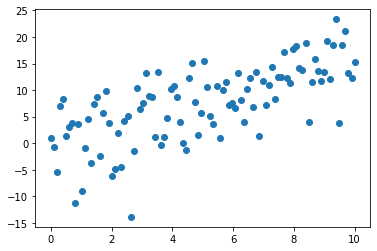

In [5]:
x = np.linspace(0,10,100)
y = f(x,a0,a1)
mu, sigma = 0, 6 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x_noise = y + s
plt.scatter(x,x_noise)
plt.show()

Split the data:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, x_noise, test_size=0.3, random_state=0)
N = x_train.shape[0]

## 2. Declare the Model

Beware that for a Lasso regression the first column of your X matrix is not the column of the intercept. Hence, it doesn't have to be a column of ones.

In [11]:
# First column
X = np.array([x_train]).T

# Transform x_train into a N*1 matrix
x_train_ = np.array([x_train]).T

# Add a column for each grade of the polynomial
for i in range(1,p):
    X = np.concatenate((X,x_train_**i), axis = 1)
    
X.shape


(70, 5)

## 3. Train the model

How do I implement the minimation law of the lasso regression?

$||x||$<sub>1</sub>$ = \sum_{i=1}^{n} |x_i|$

This term is not writable in matrix-vector form. We therefor need to use an iterative method.  
Here we will use the scikit learn library.

In [12]:
from sklearn.linear_model import Lasso

In [13]:
lasso = Lasso(alpha=N*0.1,fit_intercept=True)
lasso.fit(X,y_train)

intercept = lasso.intercept_
beta = lasso.coef_

print(intercept)
print(beta)

3.243179181244308
[ 0.          0.          0.          0.05309371 -0.00432692]


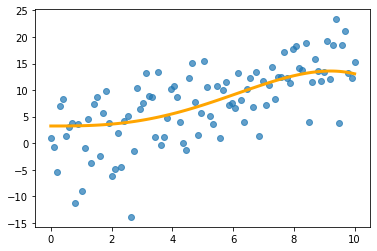

In [15]:
# Compute model response y_

X_ = np.array([x]).T

# Add a column for each grade of the polynomial
x_ = np.array([x]).T
for i in range(1,p):
    X_ = np.concatenate((X_,x_**i), axis = 1)
    
y_ = np.dot(X_,beta) + intercept

# Plot model
plt.scatter(x,x_noise,alpha=0.7)
plt.plot(x,y_,'orange',lw=3)
plt.show()

## 4. Compare the models

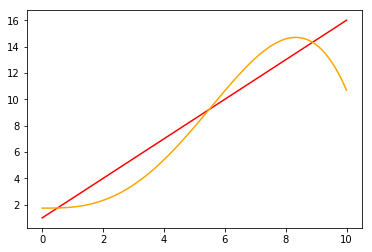

In [187]:
plt.plot(x,y,'red')
plt.plot(x,y_,'orange')
plt.show()